# Convolutional Neural Net in Tensorflow & Keras
https://keras.io/
![Image](./data/02_network_flowchart.png)

---
---
# Keras Python Machine Learning API importieren

In [34]:
import keras
keras.__version__

'2.6.0'

---
---
# importieren der gesamten MNIST Datenbank

In [35]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Ausgabe der Shape (Form)

In [36]:
print(train_images.shape)

(60000, 28, 28)


### Ausgabe der Dimension des Arrays mit `.nidm`

In [37]:
print(train_images.ndim)

3


---
---
# CNN erstellen

...im Prinzip wieder genauso wie bei einem `fully connected` Netz benötigen wir:

1. `Layer` 

2. `Eingabedaten` 

3. `Verlustfunktion`

4. `Optimierer`
<!--![Image](./data/nn.png)-->


## Module (layers & models) importieren

In [38]:
from keras import models
from keras import layers

## Initialisieren eines leeren Netzes
#### mit dem Modul `models` bestimmen wir im folgenden einen linearen Stapel von Schichten `(Sequential)`

In [39]:
cnn_model = models.Sequential()

##### Mit dem Argument `layers` definieren wir eine Liste von Layern, die dem Modell hinzugefügt werden sollen und legen die jewewiligen Attribute fest.

## 1. wir definieren einen Stapel von Conv2D- und MaxPooling-Layern

### 1.1.
`conv2d_1` Output > 32 Filter, bzw. Kanäle und jeder dieser Filter enthält ein 26x26 Raster mit Werten

In [40]:
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d_1 (Conv2D)            (None, 26, 26, 32)        320 
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

`input_shape` = 28 * 28 * Graustufenwert (image_height, image_with, image_channels)
![Image](./data/mnist-input.png)

+ Beispiel für eine Filteranwendung > `Filter` 3x3
![Image](./data/conv2d.png)

---
### 1.2.
`max_pooling2d_1` halbiert von 26x26 auf 13x13 und nimmt / extrahiert kleine Fenster daraus aus der Eingabe-Feature-Map, ausgehend von `conv2d_1` und liefert als Ausgabe dann die Maximalwerte weiter
<img src="./data/maxpooling.png" alt="drawing" width="600"/>

In [41]:
#Layer (type)                 Output Shape              Param #   
#=================================================================
#max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0   
cnn_model.add(layers.MaxPooling2D((2, 2)))

---
### 1.3.
`conv2d_2` Output > 64 Filter, bzw. Kanäle und jeder dieser Filter enthält ein 11x11 Raster mit Werten

In [42]:
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

---
### 1.4.
`max_pooling2D`  halbiert von 11x11 auf 5x5 (durch padding kleiner) und nimmt / extrahiert kleine Fenster daraus aus der Eingabe-Feature-Map, ausgehend von `conv2d_2` und liefert als Ausgabe dann die Maximalwerte weiter

In [43]:
#Layer (type)                 Output Shape              Param #   
#=================================================================
#max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
cnn_model.add(layers.MaxPooling2D((2, 2)))

---
### 1.5.
`conv2d_3` Output > 64 Filter, bzw. Kanäle und jeder dieser Filter enthält ein 3x3 Raster mit Werten

In [44]:
#Layer (type)                 Output Shape              Param #   
#=================================================================
#conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

## Darstellung der Convolutional Layer

In [45]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


---
---
## 2. nun definieren wir einen Stapel von Dense Layern als Klassifizierer:

In [46]:
#network.add(layers.Dense(10, activation='softmax'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

+ `Flatten` Vektorisiert die Shape auf 1-Dim, da Fully-Connected `Dense`-Layer nur eindimensionale Vektoren verarbeiten können
+ `64` bzw `10` = Anzahl der (fully-connected) Knoten
+ ...auf die letzten Endes die `softmax` funktion angewandt wird:

---
---

# Darstellung des gesamten Netzes

In [47]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

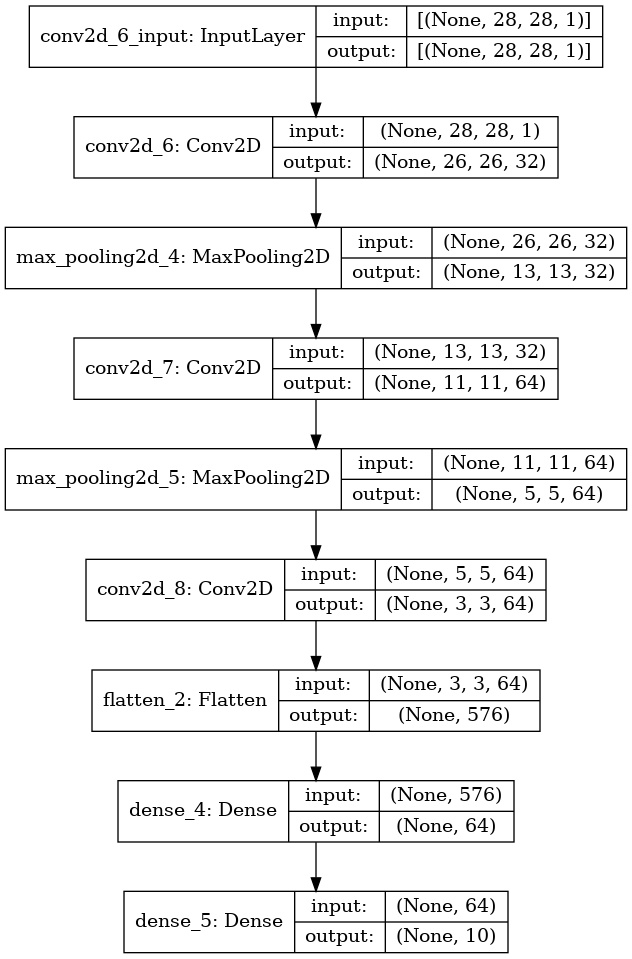

In [48]:
import pydot
import graphviz
import tensorflow as tf
tf.keras.utils.plot_model(cnn_model, show_shapes=True)

# Trainings- bzw. Testdaten vorbereiten, bzw. skalieren:
<img src="./data/scale.png" width="600" />

In [49]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
#print("Datentyp before: ", test_images.dtype)
#print(test_images[1])
test_images = test_images.astype('float32') / 255
#print("Datentyp after: ", test_images.dtype)
#print(test_images[1])

---
---
# Kodieren der Klassen (Ziffern) von 0 bis 9 - mit One-Hot-Kodierung .:
<img src="./data/one-hot.png" width="300" />

In [50]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
print("Beispiel Label vor der Encodierung: ", train_labels[1])
train_labels = to_categorical(train_labels)
print("Beilspiel Label nach der Encodierung: ", train_labels[1])

test_labels = to_categorical(test_labels)

Beispiel Label vor der Encodierung:  0
Beilspiel Label nach der Encodierung:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


---
---
# kompilieren des Netzes

In [51]:
cnn_model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

+ `optimizer` Gewichtsanpassung https://keras.io/optimizers/ https://keras.io/optimizers/#rmsprop ...hier findet die Backpropagation (basierend auf Output der Verlustfunktion) statt

Verschiedene Optimierer können eines oder mehrere Konzepte (Algorithmen) nutzen, um die Effizienz des Gradientenabfalls bei einem bestimmten Trainingssatz zu verbessern - hier eine Liste von Gradientenabstiegsalgorithmen: http://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms

Ein Optimizer ist eine spezifische Implementierung des Gradientenabstiegs- Algorithmus. 


    Gewichtsaktualisierungsformel mathematisch ausgedrückt:
        delta_wjk = alpha * Ek * OK (1-OK) * OJT
        
            delta_wjk = Gewichtsänderung der Gewichte zwischen versteckter (j) und Ausgabeschicht (k)
            alpha     = Lernrate 
            EK        = Fehlerwerte der Ausgabeschicht << output_errors
            OK        = Ausgabewerte der Ausgabeschicht << final_outputs
            OjT       = Ausgabewerte der versteckten Schicht << hidden_outputs #was heißt T????
        
    Gewichtsaktualisierungsformel in Python:
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))

            self.lr    = Lernrate
            numpy.dot()= Matrizenmultiplikation
            +=         = Addiere zum Wert self.who das Ergebnis des Ausdrucks auf der rechten Seite
            hidden_outputs = Ausgabewerte der versteckten Layer
            final_outputs  = Ausgabewerte des Outputlayers
            ouput_errors  = Fehlerwerte des Outputlayers 

+ `loss` Verlustfunktion E = S-K https://keras.io/losses/ https://keras.io/backend/#categorical_crossentropy
Verlustfunktion basierend auf dem absoluten Wert der Differenz zwischen den von einem Modell vorhergesagten Werten und den tatsächlichen Werten der Beschriftungen

  + Kreuzvalidierungsverfahren sind Testverfahren der Statistik bzw. der Datenanalyse


     Fehlerberechnung mathematisch ausgedrückt:
        E = S - K 

            Fehler = Sollwert - aktuellem Istwert

                       (  w11          w12  )
                       |-------     ------- |
                       |w11+w21     w12+w22 |   ( e1 )          ( w11   w12 )   ( e1 )
        error_hidden = |                    | * |    |     =    |           | * |    |
                       |  w21          w22  |   ( e2 )          (w21    w22 )   ( e2 )
                       |-------     ------- |
                       (w21+w11     w22+w12 )
        
        error_hidden = w_hidden-output         * error_output          

            hidden_errors = Gewichte zwischen Eingabe- und versteckter Schicht
            output_errors = Gewichte zwischen versteckter- und Ausgabeschicht   
                    output_errors = targets - final_outputs
                    targets = Optimalwerte aus der Testphase (Sollwert)

    Fehlerberechnung in Python:
        hidden_errors = numpy.dot(self.who.T, output_errors)      

+ `metrics`, definiert den Anteil der Bilder, die korrekt klassifiziert wurden https://keras.io/metrics/

---
---
# trainieren des Netzes
+ `fit()` übergibt dem Modell (NN) dee Numpy-Arrays der Eingabedaten `train_images` + Zielwerte `train_labels` 
+ `epochs` wie oft wir den gesamten Trainingssatz  durchlaufen möchten 
+ `batch_size`, Stapelgröße - wie viele Samples wir für eine Aktualisierung der Modellgewichte verwenden. 

In [52]:
cnn_model.fit(train_images, train_labels, epochs=7, batch_size=64)

Epoch 1/7
938/938 [==============================] - 51s 53ms/step - loss: 0.1715 - accuracy: 0.9464
Epoch 2/7
938/938 [==============================] - 44s 46ms/step - loss: 0.0442 - accuracy: 0.9866
Epoch 3/7
938/938 [==============================] - 37s 39ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 4/7
938/938 [==============================] - 41s 44ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 5/7
938/938 [==============================] - 38s 40ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 6/7
938/938 [==============================] - 44s 47ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 7/7
938/938 [==============================] - 48s 51ms/step - loss: 0.0128 - accuracy: 0.9963


----
----
# Evaluation

In [53]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('test_loss (Verlustrate):', test_loss)
print('test_acc (Korrektklassifzierungsrate):', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0299 - accuracy: 0.9916
test_loss (Verlustrate): 0.029919812455773354
test_acc (Korrektklassifzierungsrate): 0.991599977016449


Anzeige:
+ `loss` Verlustfunktion
+ `acc` accuracy, Genauigkeit der Trainningsdaten, Korrektklassifizierungsrate

---
---
# visuelle Evaluation...

Vorhersage:
[1.0664597e-10 6.6306171e-12 3.4852150e-13 5.7120146e-12 5.5556887e-07
 3.5659109e-10 1.2615391e-17 1.6944853e-12 3.2705108e-10 9.9999940e-01]
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 

Originalbild aus der Datenbank:


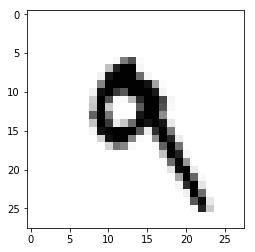

In [58]:
import numpy as np
predictions = cnn_model.predict(test_images)
print("Vorhersage:")
print(predictions[7])
print(np.argmax(predictions[7]))
print(test_labels[7], "\n")

import matplotlib.pyplot as plt
%matplotlib inline

print("Originalbild aus der Datenbank:")
test_im = test_images[7]
plt.imshow(test_im.reshape(28,28), cmap='Greys')

---
---
# Modell speichern

In [ ]:
# 11. Save model
cnn_model.save('mnist_trained_cnn_model.h5')  # creates a HDF5 file